<a href="https://colab.research.google.com/github/ShakilM26/Some_Visualisation/blob/main/seaborn/seaborn_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('car_crashes')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


**Distribution Plot**

**displot - by default this will draw a hist**

A histogram represents the distribution of data by forming bins along the range of the data and then 
drawing bars to show the number of observations that fall in each bin

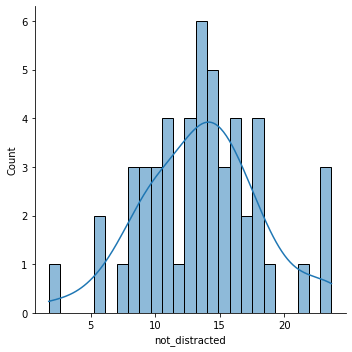

In [ ]:
sns.displot(df['not_distracted'], kde=True, bins=25)

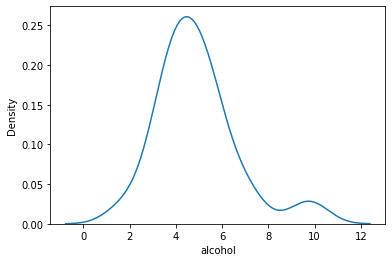

In [ ]:
sns.kdeplot(df['alcohol'])

#### **Joint Plot**

Joint plot by default it's a scatter plot

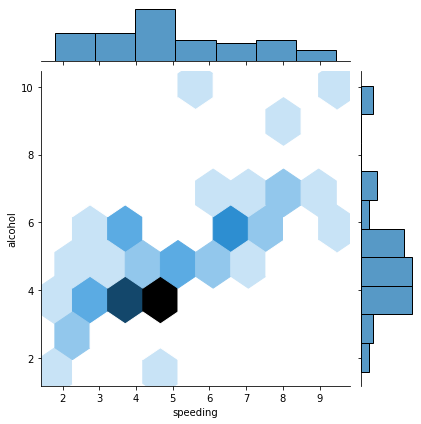

In [ ]:
sns.jointplot(x='speeding', y='alcohol', data=df, kind='hex')

#### **Pair Plot**

By default it also draws the univariate distribution of each variable on the diagonal axes. 

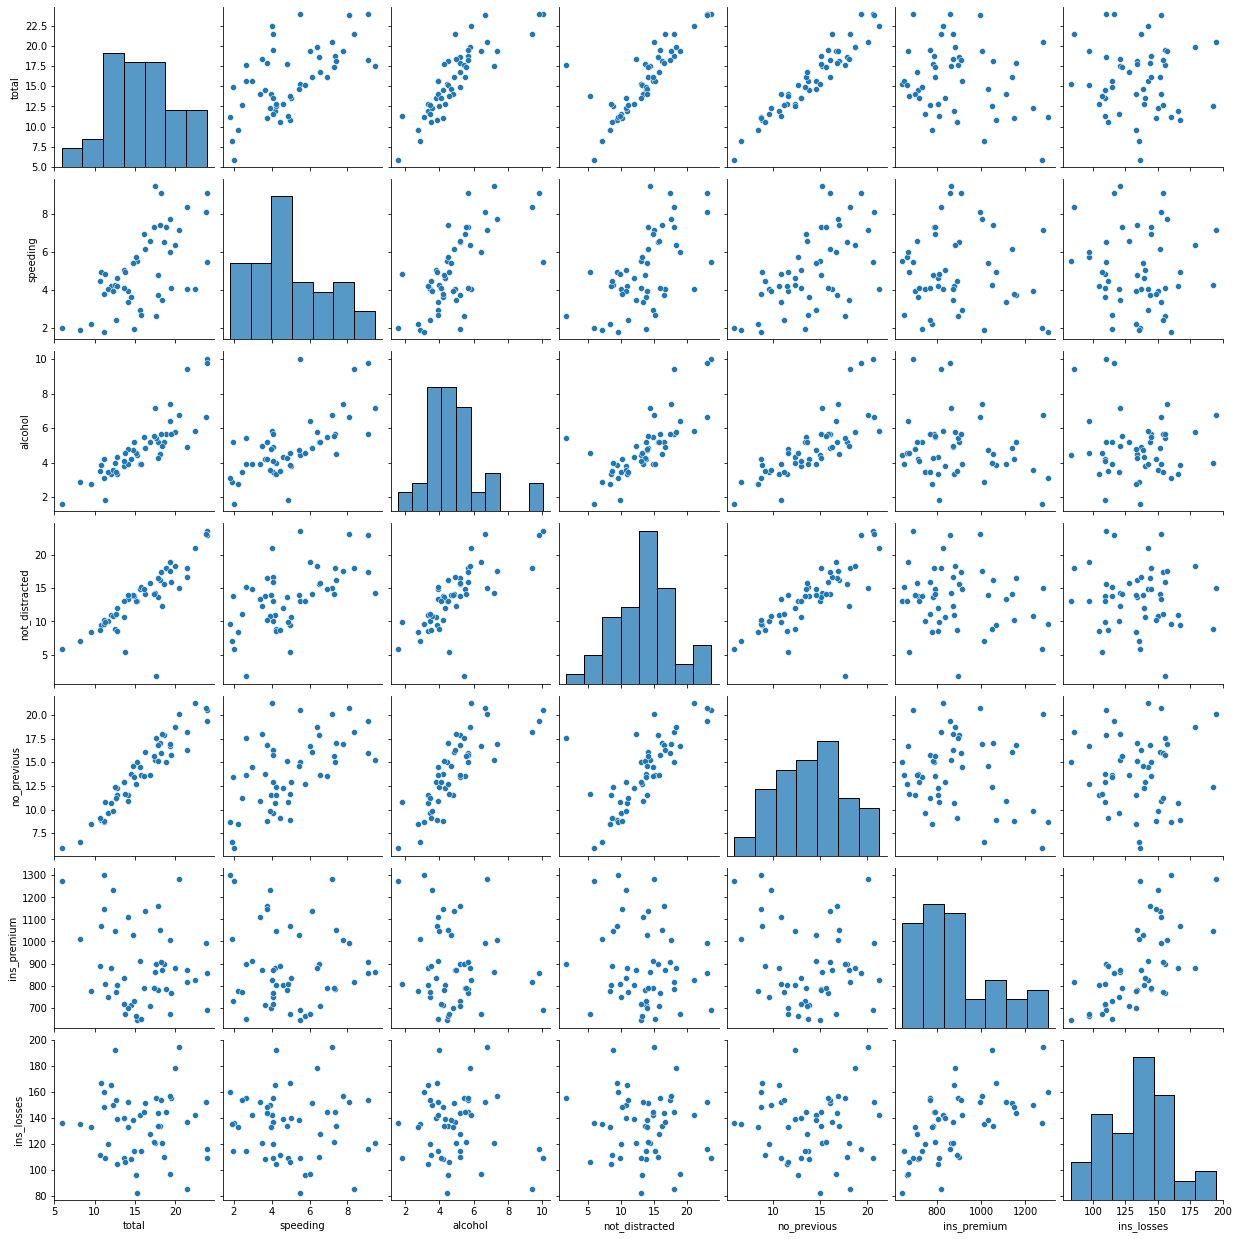

In [ ]:
sns.pairplot(df)

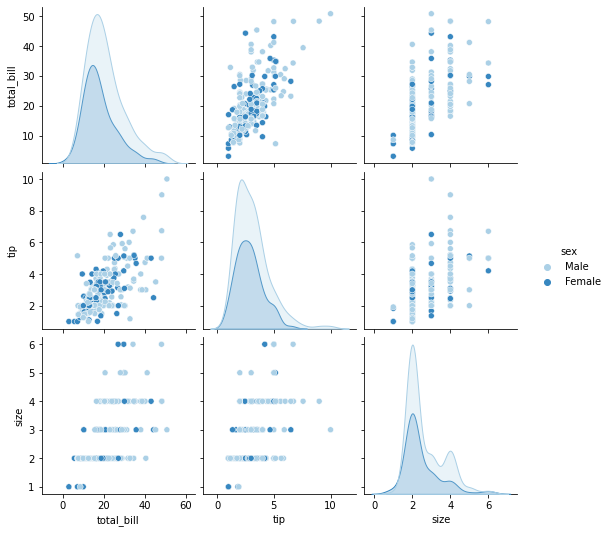

In [3]:
tips = sns.load_dataset('tips')
sns.pairplot(tips, hue='sex', palette='Blues')

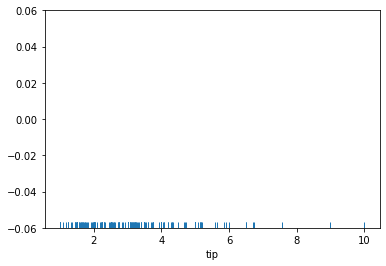

In [ ]:
# Rug Plot

sns.rugplot(tips['tip'])

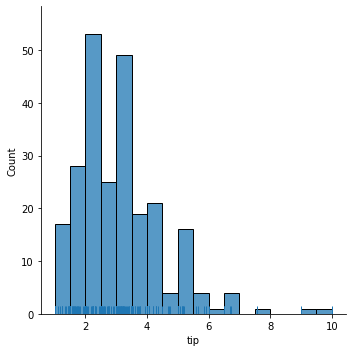

In [ ]:
# Rugplot with displot

sns.displot(tips['tip'])
sns.rugplot(tips['tip'])

<Figure size 576x288 with 0 Axes>

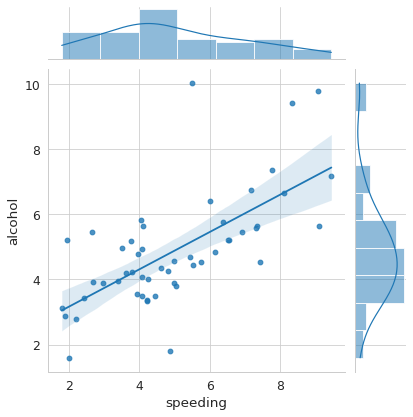

In [ ]:
# style

sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
sns.set_context('paper', font_scale=1.4)
sns.jointplot(x='speeding', y='alcohol', data=df, kind='reg')

### **Categorical Plots**

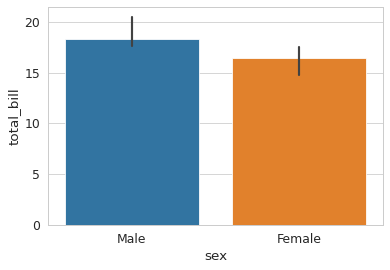

In [ ]:
import numpy as np

sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.median)

#### **Countplot**
Cannot pass values for both x and y

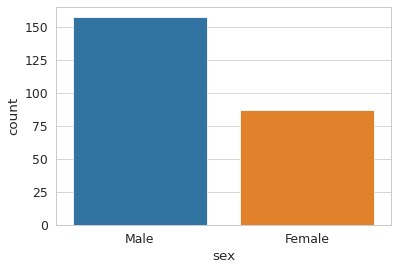

In [ ]:
sns.countplot(x='sex', data=tips)

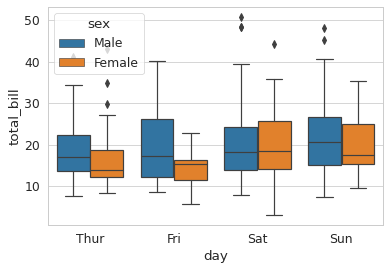

In [ ]:
# boxplot

sns.boxplot(x='day', y='total_bill', data=tips, hue='sex')

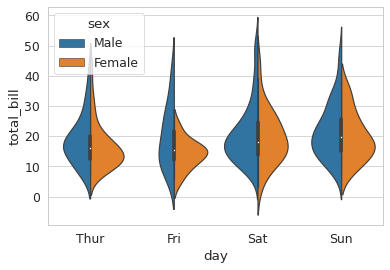

In [ ]:
# violinplot

sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

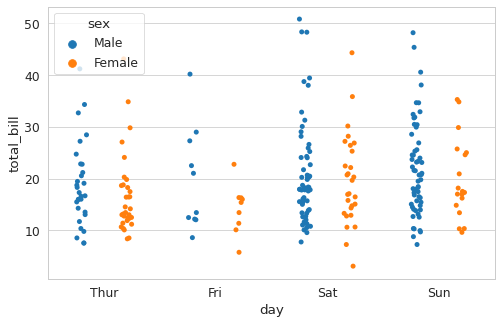

In [ ]:
# stripplot

plt.figure(figsize=(8,5))
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, 
              hue='sex', dodge=True)

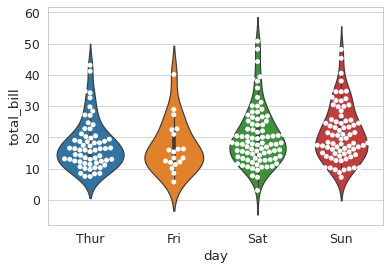

In [ ]:
# swarmplot

sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='white')

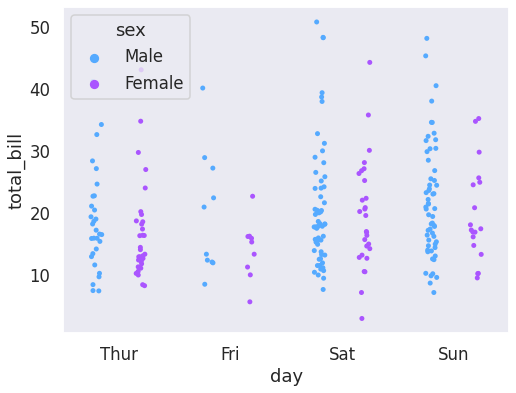

In [ ]:
# Palettes

plt.figure(figsize=(8,6))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex', dodge=True, palette='cool')

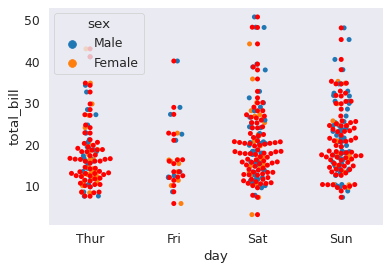

In [ ]:
sns.set_context('paper', font_scale=1.4)
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex')
sns.swarmplot(x='day', y='total_bill', data=tips, color='red')

**MatrixPlot - Heatplot**

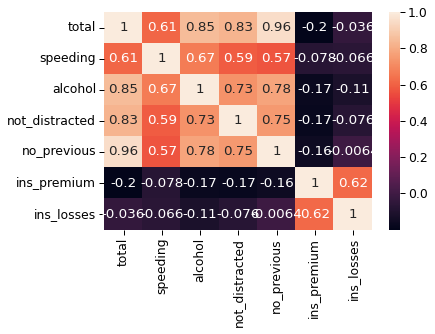

In [5]:
sns.set_context('paper', font_scale=1.4)
cr = df.corr()
cr
sns.heatmap(cr, annot=True)

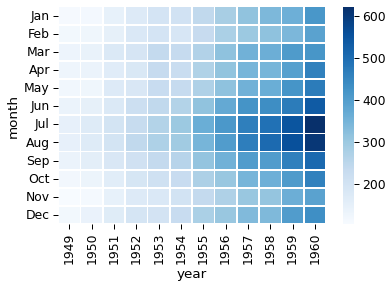

In [7]:
flight = sns.load_dataset('flights')
pivot = flight.pivot_table(index='month', columns='year', values='passengers')
sns.heatmap(pivot, cmap='Blues', linecolor='white', linewidth=0.8)

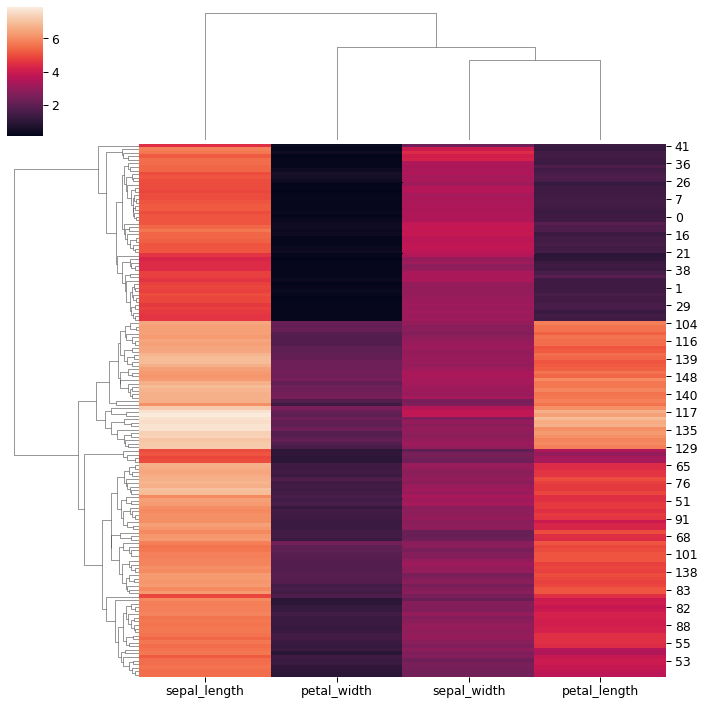

In [8]:
# Cluster Map

iris = sns.load_dataset('iris')
species = iris.pop('species')
sns.clustermap(iris)

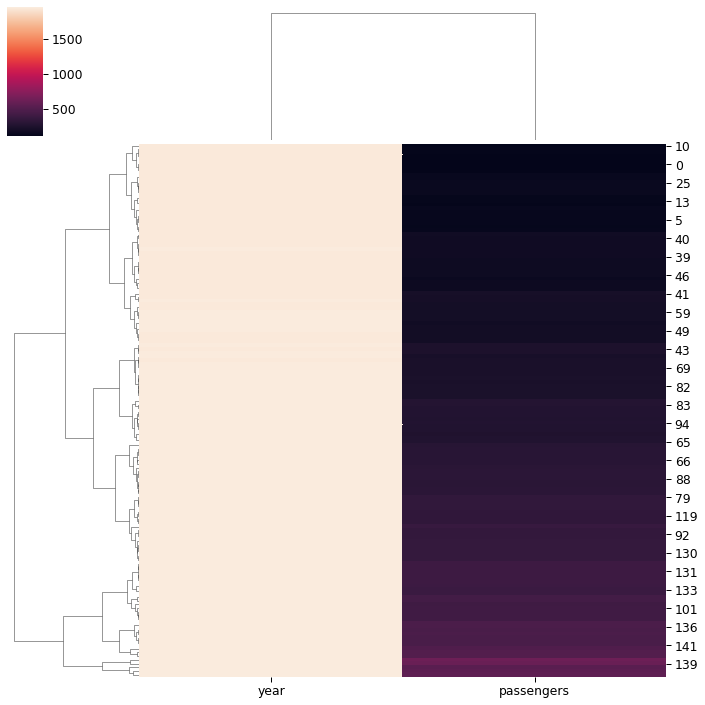

In [9]:
pop_month = flight.pop('month')
sns.clustermap(flight)

**Pair Grid**

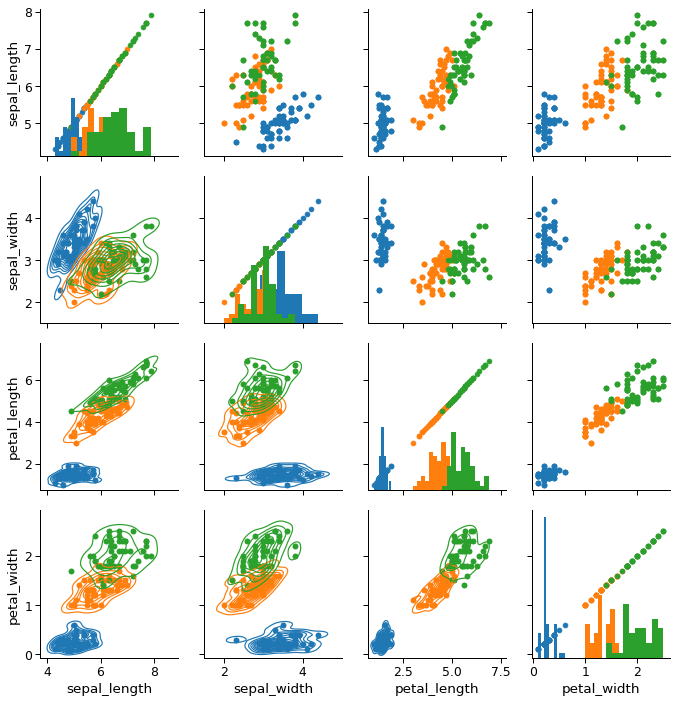

In [23]:
iris = sns.load_dataset('iris')
ir = sns.PairGrid(iris, hue='species')
ir.map(plt.scatter)

ir.map_diag(plt.hist)
ir.map_offdiag(plt.scatter)
ir.map_upper(plt.scatter)
ir.map_lower(sns.kdeplot)

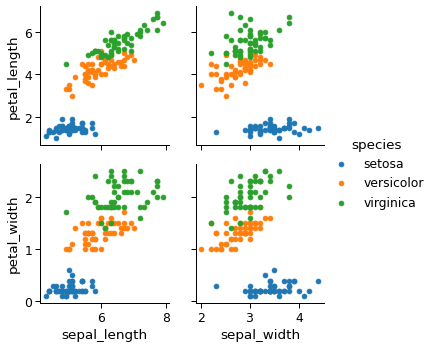

In [24]:
ir=sns.PairGrid(iris, hue='species',
x_vars=['sepal_length', 'sepal_width'],
y_vars=['petal_length', 'petal_width'])
ir.map(plt.scatter)
ir.add_legend()


### **FacetGrid**

You can able to print multiple plots in a grid where you able to define columns and rows

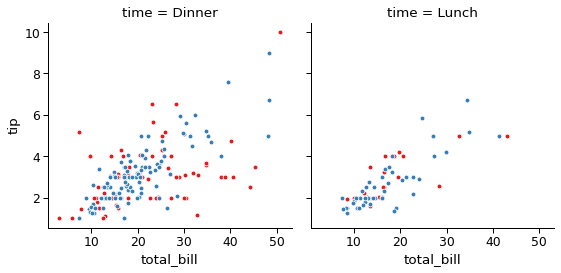

In [26]:
fg = sns.FacetGrid(tips, col='time', hue='smoker', height=4,
              aspect = 1, col_order=['Dinner', 'Lunch'],
              palette='Set1')
fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='w')

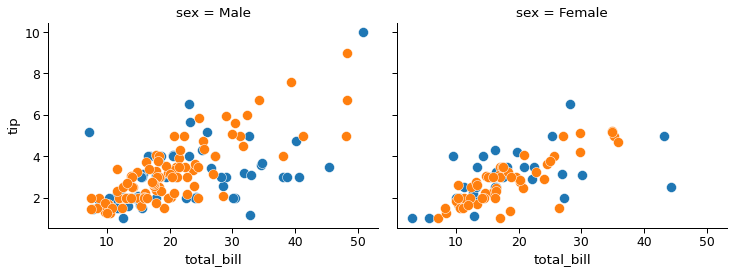

In [28]:
# Facet Grid

kws = dict(s=100, linewidth=.5, edgecolor='w')
fg = sns.FacetGrid(tips, col='sex', hue='smoker', height=4, aspect=1.3, 
                   hue_order=['Yes', 'No'])
fg.map(plt.scatter, 'total_bill', 'tip', **kws)

###**Regression Plot**

<Figure size 576x432 with 0 Axes>

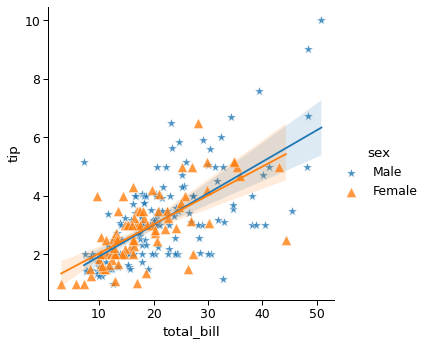

In [30]:
tips = sns.load_dataset('tips')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips,
           markers=['*', '^'], scatter_kws={'s':100, 'linewidth':0.5,
                                            'edgecolor':'w'})

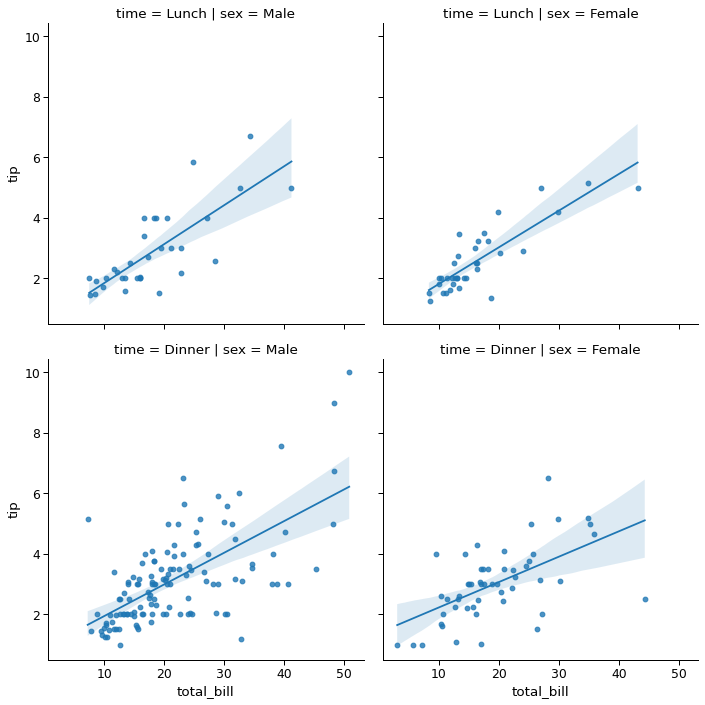

In [32]:

sns.lmplot(x='total_bill', y='tip', data=tips, col='sex',
row='time')
